<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Neural Network Framework (Keras)

## *Data Science Unit 4 Sprint 2 Assignmnet 3*

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

In [1]:
#import the data

from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 

(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

In [12]:
len(x_test[0])

13

In [15]:
#normalize
from sklearn.preprocessing import Normalizer

norm = Normalizer()

x_train = norm.fit_transform(x_train)
x_test = norm.fit_transform(x_test)

In [40]:
#Import the type of model and layers that you will need from Keras.
#Instantiate a model object and use model.add() to add layers to your model

model = Sequential(name= 'NormalizedwithSigmoid')

model.add(Dense(4, input_dim= 13, activation = 'sigmoid'))
model.add(Dense(4, activation='sigmoid'))
model.add(Dense(4, activation='sigmoid'))
model.add(Dense(1))

model.compile(loss='mean_squared_error', metrics=['mae'], optimizer= 'adam')#, metrics=['accuracy'])
model.summary()


Model: "NormalizedwithSigmoid"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 4)                 56        
_________________________________________________________________
dense_23 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_24 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 5         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [41]:
import numpy as np
np.random.seed(812)

history = model.fit(x_train, y_train, epochs=150, validation_data= (x_test, y_test))

Train on 404 samples, validate on 102 samples
Epoch 1/150
404/404 [==============================] - 1s 2ms/sample - loss: 547.7778 - mae: 21.5213 - val_loss: 574.7019 - val_mae: 22.1689
Epoch 2/150
404/404 [==============================] - 0s 84us/sample - loss: 544.9522 - mae: 21.4561 - val_loss: 571.7804 - val_mae: 22.1029
Epoch 3/150
404/404 [==============================] - 0s 105us/sample - loss: 542.1184 - mae: 21.3894 - val_loss: 568.8073 - val_mae: 22.0355
Epoch 4/150
404/404 [==============================] - 0s 99us/sample - loss: 539.2274 - mae: 21.3217 - val_loss: 565.8026 - val_mae: 21.9672
Epoch 5/150
404/404 [==============================] - 0s 114us/sample - loss: 536.2981 - mae: 21.2528 - val_loss: 562.7511 - val_mae: 21.8976
Epoch 6/150
404/404 [==============================] - 0s 126us/sample - loss: 533.3349 - mae: 21.1825 - val_loss: 559.6533 - val_mae: 21.8267
Epoch 7/150
404/404 [==============================] - 0s 114us/sample - loss: 530.3263 - mae: 21.11

In [33]:
model.evaluate(x_train, y_train)

404/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[431.13711094620203, 18.61491]

In [34]:
print(history.history.keys())

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


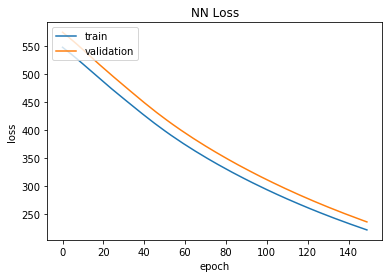

In [50]:
#Use the history object that is returned from model.fit to make graphs of 
#the model's loss or train/validation accuracies by epoch

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('NN Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


#why is it so linear??? 
#I changed it to sigmoid instead of relu and it became a little more bendy

Train mae: 11.893197753641864
Test mae 12.829472970027549


Text(0.5, 1.0, 'Regression Model Loss')

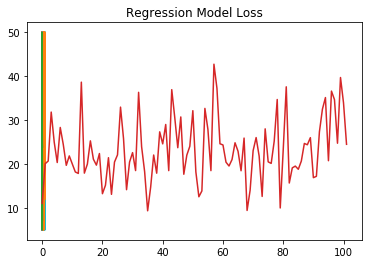

In [61]:
#Run this same data through a linear regression model. Which achieves higher accuracy?

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

lg = LinearRegression()

lg.fit(x_train, y_train)

y_pred = model.predict(x_train)
mae = mean_absolute_error(y_train, y_pred)
print('Train mae:', mae)

y_pred2 = model.predict(x_test)
mae2 = mean_absolute_error(y_test, y_pred2)
print('Test mae', mae2)

plt.plot(x_train, y_train)
plt.plot(lg.predict(x_test))
plt.title('Regression Model Loss')

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

lg = LinearRegression()

lg.fit(x_train, y_train)

print(lg.score(x_train, y_train))
'''
y_pred2 = model.predict(x_test)
mae2 = mean_absolute_error(y_test, y_pred2)
print('Test mae', mae2)

plt.plot(x_train, y_train)
plt.plot(lg.predict(x_test))
plt.title('Regression Model Loss')
'''

0.7308717463321772


"\ny_pred2 = model.predict(x_test)\nmae2 = mean_absolute_error(y_test, y_pred2)\nprint('Test mae', mae2)\n\nplt.plot(x_train, y_train)\nplt.plot(lg.predict(x_test))\nplt.title('Regression Model Loss')\n"

## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- Make sure to have your final layer have as many nodes as the number of classes that you want to predict.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

In [63]:
#Load and preprocess the image data similar to how we preprocessed the MNIST data in class.

from keras.datasets import fashion_mnist

((x_train, y_train), (x_test, y_test)) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [65]:
x_train[0].shape

(28, 28)

In [66]:
x_train.shape

(60000, 28, 28)

In [68]:
x_test.shape

(10000, 28, 28)

In [70]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [76]:
y_train[0]

9

In [69]:
#resize the data
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

#ensure variable types
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


In [72]:
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [77]:
# 
batch_size = 64
num_classes = 10
epochs = 20

In [78]:
#onehot encode 

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [79]:
#Make sure to have your final layer have as many nodes as the number of classes that you want to predict
fashion_model = Sequential()

fashion_model.add(Dense(16, input_dim=784, activation='relu'))
fashion_model.add(Dense(16, activation = 'relu'))
fashion_model.add(Dense(16, activation = 'relu'))
fashion_model.add(Dense(16, activation = 'relu'))
fashion_model.add(Dense(10, activation = 'softmax'))

fashion_model.compile(loss='categorical_crossentropy',
                     optimizer='adam',
                     metrics= ['accuracy'])

fashion_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 16)                12560     
_________________________________________________________________
dense_27 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_28 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_29 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_30 (Dense)             (None, 10)                170       
Total params: 13,546
Trainable params: 13,546
Non-trainable params: 0
_________________________________________________________________


In [80]:
history = fashion_model.fit(x_train, y_train, epochs=150, validation_data= (x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/150
60000/60000 [==============================] - 6s 98us/sample - loss: 1.2368 - accuracy: 0.6346 - val_loss: 0.7402 - val_accuracy: 0.7269
Epoch 2/150
60000/60000 [==============================] - 6s 92us/sample - loss: 0.6658 - accuracy: 0.7566 - val_loss: 0.6639 - val_accuracy: 0.7505
Epoch 3/150
60000/60000 [==============================] - 6s 100us/sample - loss: 0.6096 - accuracy: 0.7804 - val_loss: 0.5986 - val_accuracy: 0.7843
Epoch 4/150
60000/60000 [==============================] - 8s 127us/sample - loss: 0.5773 - accuracy: 0.7921 - val_loss: 0.6263 - val_accuracy: 0.7700
Epoch 5/150
60000/60000 [==============================] - 7s 121us/sample - loss: 0.5515 - accuracy: 0.8015 - val_loss: 0.6679 - val_accuracy: 0.7610
Epoch 6/150
60000/60000 [==============================] - 9s 144us/sample - loss: 0.5364 - accuracy: 0.8057 - val_loss: 0.5543 - val_accuracy: 0.7993
Epoch 7/150
60000/60000 [=====================

In [ ]:
fashion_model.evaluate(x_train, y_train)
# the output is too many=====
#so this is what it put out 
'''
- 2s 30us/sample - loss: 0.3414 - accuracy: 0.8726
[82]:
[0.3499822506070137, 0.87256664]
'''

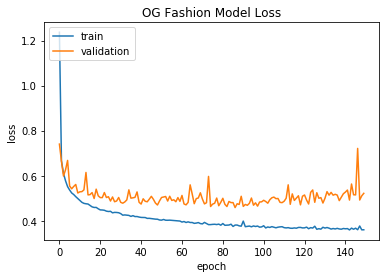

In [85]:
#I mean, it seems pretty good
#87% accuracy rate

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('OG Fashion Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [86]:
#Try different hyperparameters. What is the highest accuracy that you are able to achieve.

#I am thinking I am gonna try the dropout regularization 
#since it prevents overfitting it probably will make the score drop 

#since I have nothing to compare it against, I am going to run the above model again, but with 
#less layers and only 50 epochs (it took forever to run before) and then do dropout but with that structure

fashion_model2 = Sequential()

fashion_model2.add(Dense(16, input_dim=784, activation='relu'))
fashion_model2.add(Dense(16, activation = 'relu'))
fashion_model2.add(Dense(16, activation = 'relu'))
fashion_model2.add(Dense(10, activation = 'softmax'))

fashion_model2.compile(loss='categorical_crossentropy',
                     optimizer='adam',
                     metrics= ['accuracy'])

fashion_model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 16)                12560     
_________________________________________________________________
dense_32 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_33 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_34 (Dense)             (None, 10)                170       
Total params: 13,274
Trainable params: 13,274
Non-trainable params: 0
_________________________________________________________________


In [87]:
history2 = fashion_model2.fit(x_train, y_train, epochs=50, validation_data= (x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 6s 93us/sample - loss: 1.6395 - accuracy: 0.4821 - val_loss: 1.0697 - val_accuracy: 0.5849
Epoch 2/50
60000/60000 [==============================] - 5s 85us/sample - loss: 0.9102 - accuracy: 0.6423 - val_loss: 0.7658 - val_accuracy: 0.7056
Epoch 3/50
60000/60000 [==============================] - 6s 93us/sample - loss: 0.7049 - accuracy: 0.7300 - val_loss: 0.6841 - val_accuracy: 0.7245
Epoch 4/50
60000/60000 [==============================] - 4s 72us/sample - loss: 0.6422 - accuracy: 0.7663 - val_loss: 0.6256 - val_accuracy: 0.7750
Epoch 5/50
60000/60000 [==============================] - 6s 95us/sample - loss: 0.5933 - accuracy: 0.7882 - val_loss: 0.5847 - val_accuracy: 0.7928
Epoch 6/50
60000/60000 [==============================] - 7s 118us/sample - loss: 0.5517 - accuracy: 0.8120 - val_loss: 0.5974 - val_accuracy: 0.8092
Epoch 7/50
60000/60000 [==============================]

In [ ]:
fashion_model2.evaluate(x_train, y_train)
#output is way too long
'''
- 2s 29us/sample - loss: 0.3079 - accuracy: 0.8795
[88]:
[0.32642288631598154, 0.87951666]
'''

#it is better in less epochs than the original  with another layer, dang

In [89]:
#same layers/epochs with dropout

fashion_model3 = Sequential()

fashion_model3.add(Dense(16, input_dim=784, activation='relu'))
fashion_model3.add(Dropout(0.2))
fashion_model3.add(Dense(16, activation = 'relu'))
fashion_model3.add(Dense(16, activation = 'relu'))
fashion_model3.add(Dropout(0.2))
fashion_model3.add(Dense(10, activation = 'softmax'))

fashion_model3.compile(loss='categorical_crossentropy',
                     optimizer='adam',
                     metrics= ['accuracy'])

fashion_model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 16)                12560     
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_36 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_37 (Dense)             (None, 16)                272       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_38 (Dense)             (None, 10)                170       
Total params: 13,274
Trainable params: 13,274
Non-trainable params: 0
__________________________________________________

In [90]:
history3 = fashion_model3.fit(x_train, y_train, epochs=50, validation_data= (x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 6s 96us/sample - loss: 2.3996 - accuracy: 0.1415 - val_loss: 1.9107 - val_accuracy: 0.2192
Epoch 2/50
60000/60000 [==============================] - 5s 83us/sample - loss: 1.8824 - accuracy: 0.2467 - val_loss: 1.5509 - val_accuracy: 0.4387
Epoch 3/50
60000/60000 [==============================] - 5s 91us/sample - loss: 1.6528 - accuracy: 0.3234 - val_loss: 1.4286 - val_accuracy: 0.4367
Epoch 4/50
60000/60000 [==============================] - 5s 85us/sample - loss: 1.5514 - accuracy: 0.3587 - val_loss: 1.3617 - val_accuracy: 0.4516
Epoch 5/50
60000/60000 [==============================] - 8s 126us/sample - loss: 1.5074 - accuracy: 0.3731 - val_loss: 1.3224 - val_accuracy: 0.4501
Epoch 6/50
60000/60000 [==============================] - 6s 108us/sample - loss: 1.4836 - accuracy: 0.3803 - val_loss: 1.3670 - val_accuracy: 0.4385
Epoch 7/50
60000/60000 [==============================

In [ ]:
fashion_model3.evaluate(x_train, y_train)
'''
- 2s 31us/sample - loss: 0.9731 - accuracy: 0.6312
[91]:
[0.9654868132273356, 0.6311833]
'''

#the scores decreased pretty significantly, 87% to 63%

In [92]:
#I also want to compare sme layers/epochs but with sigmoid instead of relu

fashion_model4 = Sequential()

fashion_model4.add(Dense(16, input_dim=784, activation='sigmoid'))
fashion_model4.add(Dense(16, activation = 'sigmoid'))
fashion_model4.add(Dense(16, activation = 'sigmoid'))
fashion_model4.add(Dense(10, activation = 'softmax'))

fashion_model4.compile(loss='categorical_crossentropy',
                     optimizer='adam',
                     metrics= ['accuracy'])

fashion_model4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 16)                12560     
_________________________________________________________________
dense_40 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_41 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_42 (Dense)             (None, 10)                170       
Total params: 13,274
Trainable params: 13,274
Non-trainable params: 0
_________________________________________________________________


In [93]:
history4 = fashion_model4.fit(x_train, y_train, epochs=50, validation_data= (x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 6s 106us/sample - loss: 1.6566 - accuracy: 0.4020 - val_loss: 1.2652 - val_accuracy: 0.4284
Epoch 2/50
60000/60000 [==============================] - 5s 85us/sample - loss: 1.1609 - accuracy: 0.5256 - val_loss: 1.1763 - val_accuracy: 0.5300
Epoch 3/50
60000/60000 [==============================] - 6s 93us/sample - loss: 1.0404 - accuracy: 0.5830 - val_loss: 0.9750 - val_accuracy: 0.6227
Epoch 4/50
60000/60000 [==============================] - 5s 75us/sample - loss: 1.0001 - accuracy: 0.6151 - val_loss: 0.9623 - val_accuracy: 0.6216
Epoch 5/50
60000/60000 [==============================] - 9s 149us/sample - loss: 0.9409 - accuracy: 0.6327 - val_loss: 0.9194 - val_accuracy: 0.6386 - loss: 0
Epoch 6/50
60000/60000 [==============================] - 8s 135us/sample - loss: 0.9499 - accuracy: 0.6196 - val_loss: 0.9079 - val_accuracy: 0.6358
Epoch 7/50
60000/60000 [===================

In [ ]:
fashion_model4.evaluate(x_train, y_train)
'''
- 2s 31us/sample - loss: 0.6446 - accuracy: 0.7695
[95]:
[0.6548968405445417, 0.76951665]
'''
#76%

In [99]:
#lets do some leaky relu too just for kicks

from keras.layers import LeakyReLU

fashion_model5 = Sequential()

fashion_model5.add(Dense(16, input_dim=784, activation='relu'))
fashion_model5.add(Dense(16, activation = 'relu'))
fashion_model5.add(LeakyReLU(alpha = 0.3))
fashion_model5.add(Dense(16, activation = 'relu'))
fashion_model5.add(Dense(10, activation = 'softmax'))

fashion_model5.compile(loss='categorical_crossentropy',
                     optimizer='adam',
                     metrics= ['accuracy'])

fashion_model5.summary()

TypeError: The added layer must be an instance of class Layer. Found: <keras.layers.advanced_activations.LeakyReLU object at 0x000002652D6D5048>

In [ ]:
history5 = fashion_model5.fit(x_train, y_train, epochs=50, validation_data= (x_test, y_test))

In [ ]:
fashion_module5.evaluate(x_train, y_train)

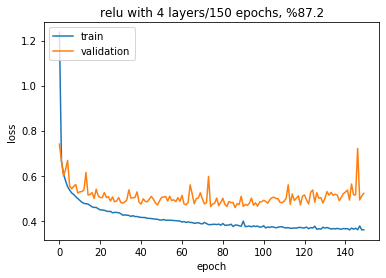

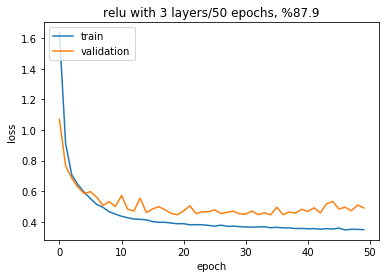

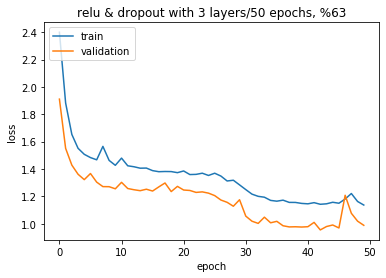

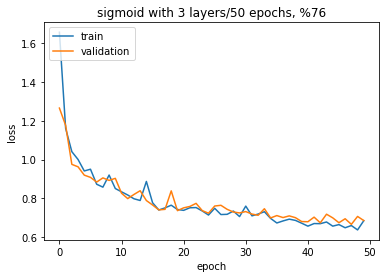

In [102]:
#lets plot ALL that shit in one spot so its nice and easy

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('relu with 4 layers/150 epochs, %87.2')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('relu with 3 layers/50 epochs, %87.9')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('relu & dropout with 3 layers/50 epochs, %63')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('sigmoid with 3 layers/50 epochs, %76')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.